In [32]:
import emcee
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp

In [3]:
def load_and_process_csv(file_path):
    data = np.loadtxt(file_path, delimiter=',', skiprows=2)
    if data.shape[1] < 2:
        raise ValueError(f"Data in {file_path} must have at least two columns for 2D plotting")
    return data

def load_acceptance_rate(file_path):
    acceptance_rate = np.loadtxt(file_path, delimiter=',', skiprows=1, max_rows=1)[0]
    return acceptance_rate

In [9]:
# Paths to the CSV files
csv_file_paths_hmc = ['HMC_data/HMC_samples_15D_10000.csv', 'HMC_data/HMC_samples_15D_50000.csv', 'HMC_data/HMC_samples_15D_100000.csv']  # Replace with your actual file paths

# Load and process each CSV file
HMC_data = [load_and_process_csv(file_path) for file_path in csv_file_paths_hmc]
HMC_acceptance_rate = [load_acceptance_rate(file_path) for file_path in csv_file_paths_hmc]
# Paths to the CSV files
csv_file_paths_mh = ['MH_data/MH_samples_15D_10000.csv', 'MH_data/MH_samples_15D_50000.csv', 'MH_data/MH_samples_15D_100000.csv']  # Replace with your actual file paths

# Load and process each CSV file
MH_data = [load_and_process_csv(file_path) for file_path in csv_file_paths_mh]
MH_acceptance_rate = [load_acceptance_rate(file_path) for file_path in csv_file_paths_mh]


HMC_corr_time = [emcee.autocorr.integrated_time(HMC_data[i], quiet=True)[0] for i in range (0,len(HMC_acceptance_rate))]
MH_corr_time = [emcee.autocorr.integrated_time(MH_data[i], quiet=True)[0] for i in range (0,len(MH_acceptance_rate))]

The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [486.30024297]


In [10]:
MH_acceptance_rate

[0.0073, 0.00948, 0.00865]

In [11]:
MH_corr_time

[486.30024297095696, 634.7529177739052, 466.5925709038708]

In [12]:
HMC_corr_time

[84.05948246398597, 67.12954667128751, 66.3466074303437]

In [38]:
HMC_acceptance_rate

[0.9962, 0.995, 0.99515]

In [15]:
mean_MH = np.mean(MH_data[2], axis=0)
covariance_MH = np.cov(MH_data[2].T) 

In [16]:
mean_HMC = np.mean(HMC_data[2], axis=0)
covariance_HMC = np.cov(HMC_data[2].T)

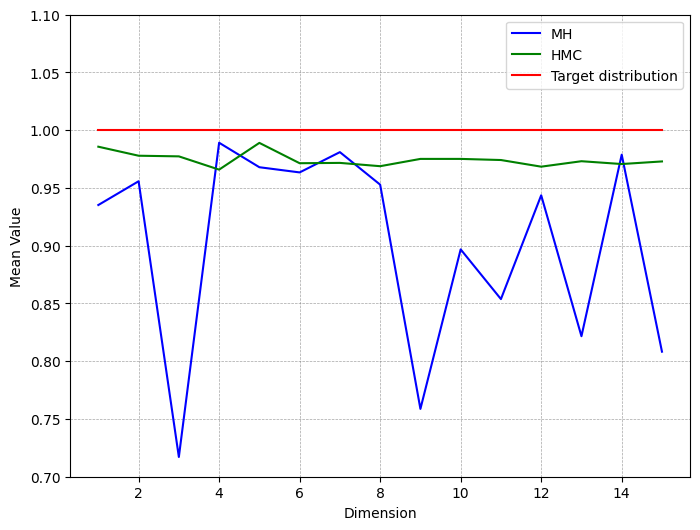

In [31]:
plt.figure(figsize=(8, 6))  # Set figure size

# Define line styles and colors for clarity
line_styles = ['-', '-', '-']
colors = ['b', 'g', 'r']  # Choose color palette for lines

# Plot the data with labels and styles
plt.plot(range(1, 16), mean_MH, label='MH', linestyle=line_styles[0], color=colors[0])
plt.plot(range(1, 16), mean_HMC, label='HMC', linestyle=line_styles[1], color=colors[1])
plt.plot(range(1,16), np.ones(15), label='Target distribution', linestyle=line_styles[2], color=colors[2])

# Set labels and title
plt.xlabel('Dimension')
plt.ylabel('Mean Value')

# Add grid with specific line style
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both', alpha=0.7)
plt.legend()
# Adjust axis limits with some buffer
plt.ylim((0.7, 1.1))  # Add a slight buffer around original limits

plt.show()

In [35]:
cov_real = jnp.eye(15)* 0.5 + 0.5

In [36]:
difference_HMC = cov_real-covariance_HMC

squared_errors_HMC = difference_HMC**2

# Calculate mean squared error (MSE)
mean_squared_error_HMC = np.mean(squared_errors_HMC)

# Calculate root mean squared error (RMSE)
rmse_HMC = np.sqrt(mean_squared_error_HMC)

rmse_HMC

0.015743325

In [37]:
difference_MH = cov_real-covariance_MH

squared_errors_MH = difference_MH**2

# Calculate mean squared error (MSE)
mean_squared_error_MH = np.mean(squared_errors_MH)

# Calculate root mean squared error (RMSE)
rmse_MH = np.sqrt(mean_squared_error_MH)

rmse_MH

0.06558854